<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Review](#0)<br>
2.  [Variance](#2)<br> 
3.  [Standard Deviation](#4)<br>     
4.  [Exercise 1](#6)<br> 
5.  [Exercise 2](#8)<br>
6.  [Exercise 3](#10)<br>    
</div>
<hr>

<h2>Review</h2><a id="0"></a>


Calculate the mean, median, mode and standard deviation of the following data set:<br>
<code>
summer_temps = {'2020-04-01': [72,83],
                '2020-04-02': [64,72],
                '2020-04-03': [66,69],
                '2020-04-04': [70,88],
                '2020-04-05': [75,79],
                '2020-04-06': [71,80],
                '2020-04-07': [68,74],
                '2020-04-08': [69,76],
                '2020-04-09': [62,80],
                '2020-04-10': [71,84],
                '2020-04-11': [70,88],
                '2020-04-12': [65,73],
                '2020-04-13': [67,85],
                '2020-04-14': [76,89],
                '2020-04-15': [74,88],
               }
</code>
<br>
The first temperature represents the daily low and the 2nd represents<br>
the daily high.<br>
Calculate the following statistics:<br>
1 - The mean, mode, median daily low<br>
2 - The mean, mode, median daily high<br>
3 - What is the daily temperature difference every day?<br>
4 - What is the mean daily temperate difference every day?<br>

<h4>Solution</h4>

In [ ]:
import math
class BaseStatistics:
    def __init__(self,base_list):
        base_list.sort()
        self.ordered = base_list
        self.list_len = len(self.ordered)
        
    def calc_mean(self):
        if len(self.ordered) > 0:
            return round(sum(self.ordered)/self.list_len,2)

    def calc_median(self):
        if self.list_len % 2 == 0:
            pos = (self.list_len/2) - 1
            median = (self.ordered[int(pos+1)] + self.ordered[int(pos)])/2
        else:
            median = self.ordered[int(((self.list_len + 1)/2) - 1)] 
        return median
    
    def calc_mode(self):
        mode = None
        temp_mode = {}
        for num in self.ordered:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        # print(temp_mode)
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1] , reverse = True)
        # print(ans_sort)

        # Step 1 - Get the max number
        max_num = ans_sort[0][1]

        # Use the value to get all of the keys with that value using list comprehension
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
        

In [ ]:
summer_temps = {'2020-04-01': [72,83], '2020-04-02': [64,72], '2020-04-03': [66,69], '2020-04-04': [70,88], 
                '2020-04-05': [75,79], '2020-04-06': [71,80], '2020-04-07': [68,74], '2020-04-08': [69,76], 
                '2020-04-09': [62,80], '2020-04-10': [71,84], '2020-04-11': [70,88], '2020-04-12': [65,73], 
                '2020-04-13': [67,85], '2020-04-14': [76,89], '2020-04-15': [74,88],}
low_temp = []
high_temp = []
for k,v in summer_temps.items():
    print(k,v, v[0])
    low_temp.append(v[0])
    high_temp.append(v[1])

low_temp.sort()
print(low_temp)

print(f'The mean for the lows is {round(calc_mean(low_temp),2)}')
print(f'The mean for the highs is {round(calc_mean(high_temp),2)}')  
print(f'The median for the lows is {round(calc_median(low_temp),2)}')
print(f'The median for the highs is {round(calc_median(high_temp),2)}')  
print(f'The mode for the lows is {round(calc_mode(low_temp),2)}')
print(f'The mode for the highs is {round(calc_mode(high_temp),2)}')

2020-04-01 [72, 83] 72
2020-04-02 [64, 72] 64
2020-04-03 [66, 69] 66
2020-04-04 [70, 88] 70
2020-04-05 [75, 79] 75
2020-04-06 [71, 80] 71
2020-04-07 [68, 74] 68
2020-04-08 [69, 76] 69
2020-04-09 [62, 80] 62
2020-04-10 [71, 84] 71
2020-04-11 [70, 88] 70
2020-04-12 [65, 73] 65
2020-04-13 [67, 85] 67
2020-04-14 [76, 89] 76
2020-04-15 [74, 88] 74
[62, 64, 65, 66, 67, 68, 69, 70, 70, 71, 71, 72, 74, 75, 76]


<h2>Population Variance</h2><a id="2"></a>
It is the average of the squared differences from the mean<br>


$\sum_{i=1}^{n} (X_i - mean)^2$/n<br><br>
Calculating the variance starts with calculating the mean<br>
Steps for calculating the variance:<br>
step 1 - Calculate the mean<br>
step 2 - Subtract the mean from each number<br>
step 3 - Square the difference of each value<br>
step 4 - Sum the squares<br>
step 5 - Divide by the number of items<br>
<br>
<code>
grades = [84, 86, 80, 78, 90, 92, 94, 91, 89, 90]
</code>
<br>
Calculate the variance of the data set

In [ ]:
x = [84, 86, 80, 78, 90, 92, 94, 91, 89, 90]
'''
def calc_var(lst):
    avg = sum(grades)/len(grades)
        #avg = calc_mean(lst)
    x = [x - avg for x in lst]
    x_square = [y**2 for y in x]
    x_sum = sum(x_square)
    res = x_sum/len(lst)
    return res
'''
def calc_var(lst):
  return sum([(i - sum(x) / len(x))**2 for i in x]) / len(x)
print(calc_var(x))


#import statistics
#statistics.variance(lst)

25.04


<h2>Standard Deviation</h2><a id="4"></a>
The standard deviation is a measure of how spread out the numbers in a data set are.<br>
The formula is the square root of the variance.<br><br>

$\sqrt(\sum_{i=1}^{n} (X_i - mean)^2$/n)<br><br>


In [ ]:
import math
def calc_std(lst):
  std = math.sqrt(calc_var(lst))
  return std
print(calc_std(grades))

#import statistics
#statistics.variance(lst)

5.0039984012787215


<h2>Population vs Sample</h2>
When we have all of the data collected from a studied topic we can calculate<br>
the statistics like standard deviation of a population.  However, we will<br>
usually use the sample statistic of variance and standard deviation by<br>
dividing by n-1.  Which is the population minus 1.  Therefore the calculation<br>
of the <b>sample variance</b> is:<br><br>

$\sum_{i=1}^{n} (X_i - mean)$/(n-1)<br><br>

and the <b>sample standard deviation</b> is:<br><br>

$\sqrt(\sum_{i=1}^{n} (X_i - mean)$/(n-1)<br><br>

<h4>Empirical rule</h4>
The empirical rule states that if a population has a normal distribution (bell shaped)<br>
68% of the values lie within 1 SD of the mean<br>
95% of the values lie within 2 SDs of the mean<br>
99% of the values lie within 3 SDs of the mean<br>

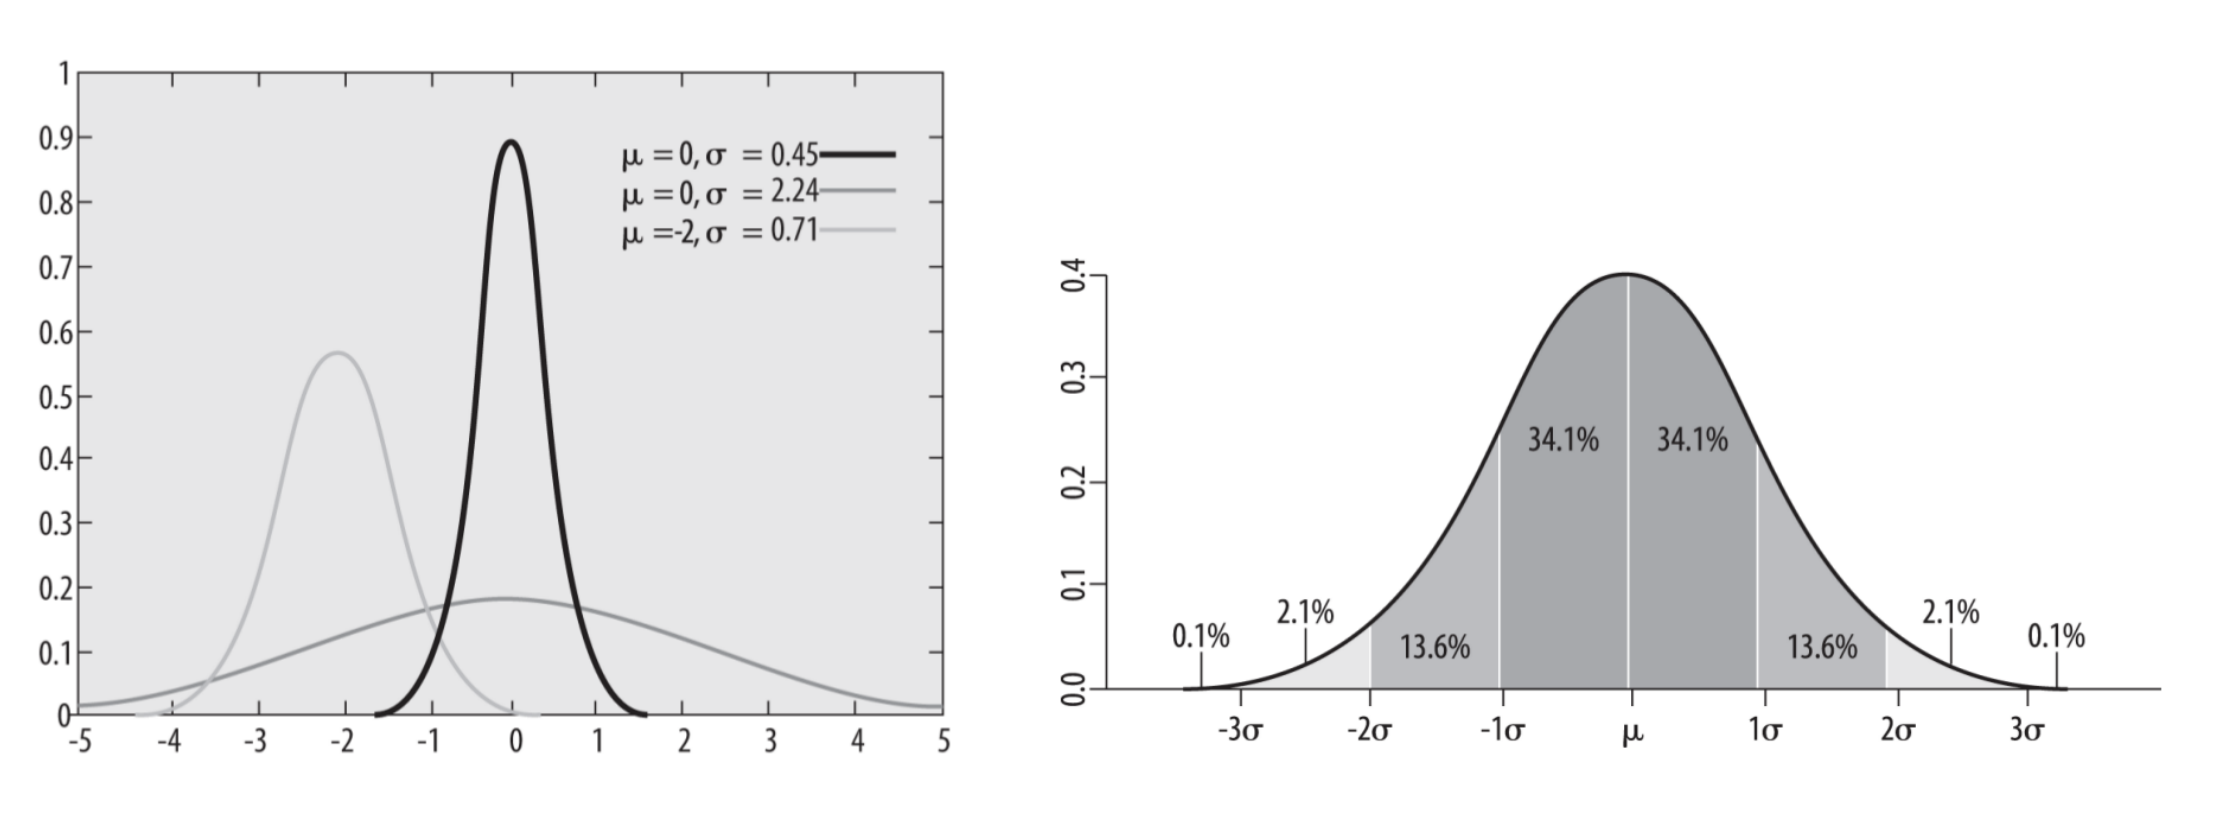

<h2>Exercise</h2>
Using the previous file grades.txt calculate the following:<br>
Calculate the boundaries of 1 standard deviation above and below the mean<br>
1 STD goes from (mean - stdev) to (mean + stdev)<br>
Calculate the boundaries of 2 standard deviation above and below the mean<br>
2 STD goes from (mean - 2*stdev) to (mean + 2*stdev)<br>
Calculate the boundaries of 3 standard deviation above and below the mean<br>
3 STD goes from (mean - 3*stdev) to (mean + 3*stdev)<br>
<br>
Calculate the percentage of values that lie within those boundaries.<br>
Is this a normal distribution?<br>
<br>

In [ ]:
grades = [84, 86, 80, 78, 90, 92, 94, 91, 89, 90]
mean = sum(grades)/len(grades)
stdev = calc_std(grades)
b1 = (mean-stdev, mean+stdev)
grades.sort()
print(grades)
print(b1)
b2 = (mean-2*stdev, mean+2*stdev)
print(b2)
b3 = (mean-3*stdev, mean+3*stdev)
print(b3)



[78, 80, 84, 86, 89, 90, 90, 91, 92, 94]
(82.39600159872128, 92.40399840127873)
(77.39200319744256, 97.40799680255745)
(72.38800479616384, 102.41199520383617)


In [ ]:
grades = [84, 86, 80, 78, 90, 92, 94, 91, 89, 90]
boundaries = []
for i in range(1,6):
    s_dev1 = get_mean(grades) - (i * get_std_dev(grades))
    s_dev2 = get_mean(grades) + (i* get_std_dev(grades))
    res = (s_dev1, s_dev2)
    boundaries.append(res)
    print(f"Boundaries of {i} STD: {res[0]} - {res[1]}")
print(boundaries)

<h2>Standard Deviation related to the mean</h2>
<br>
What happens if we add a fixed number to values?  How does it<br>
affect the mean?<br>
<code>
grades = [78, 80, 67, 77, 76, 78, 82, 74, 77, 70]
fixed_amt = 10
</code>
<br>
The instructor determines that he will add 10 points to every exam given<br>
How does this affect the mean and the standard deviation?<br>
What happens when you change the fixed amount?<br>

<h4>Solution</h4>

In [ ]:
import math
grades = [78, 80, 67, 77, 76, 78, 82, 74, 77, 70] 
print("Original average:", sum(grades)/len(grades))
print("Original Stdev:", calc_std(grades))
fixed_amt = 10
grades = [grade + fixed_amt for grade in grades]
print("New Average:", sum(grades)/len(grades))
print("New Stdev:", calc_std(grades))

Original average: 75.9
Original Stdev: 4.27668095606862
New Average: 85.9
New Stdev: 4.27668095606862


<h3>OBSERVATION</h3>
The mean was increased by the factor, however, the standard deviation did not change!<br>

<h2>Exercise</h2>
We now want to multiply each item in our data set by a fixed amount.<br>
How does this affect the mean and the standard deviation?<br>

<h4>Solution</h4>

In [ ]:
print("Original average:", sum(grades)/len(grades))
print("Original Stdev:", calc_std(grades))
fixed_amt = 5
grades = [grade * fixed_amt for grade in grades]
print("New Average:", sum(grades)/len(grades))
print("New Stdev:", calc_std(grades))

Original average: 85.9
Original Stdev: 4.27668095606862
New Average: 429.5
New Stdev: 21.383404780343096


*BONUS* What do you think will happen to the variance? 

<h3>OBSERVATION</h3>
The mean was multiplied by the factor and the standard deviation was multiplied by the factor!<br>
Multiplying will spread the data which will increase the standard deviation.<br>

Adding new functionality to our class:

In [ ]:
import math
class BaseStatistics:
    def __init__(self,base_list):
        base_list.sort()
        self.ordered = base_list
        self.list_len = len(self.ordered)
        
    def calc_mean(self):
        if len(self.ordered) > 0:
            return round(sum(self.ordered)/self.list_len,2)

    def calc_median(self):
        if self.list_len % 2 == 0:
            pos = (self.list_len/2) - 1
            median = (self.ordered[int(pos+1)] + self.ordered[int(pos)])/2
        else:
            median = self.ordered[int(((self.list_len + 1)/2) - 1)] 
        return median
    
    def calc_mode(self):
        mode = None
        temp_mode = {}
        for num in self.ordered:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        # print(temp_mode)
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1] , reverse = True)
        # print(ans_sort)

        # Step 1 - Get the max number
        max_num = ans_sort[0][1]

        # Use the value to get all of the keys with that value using list comprehension
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
        
    def calc_max(self):
        return max(self.ordered)
    
    def calc_min(self):
        return min(self.ordered)
    
    def calc_range(self):
        return self.calc_max() - self.calc_min()
    
    def calc_stdev(self):
        mean = self.calc_mean()
        variance = sum([(x-mean)**2 for x in self.ordered])/len(self.ordered)
        return math.sqrt(variance)
    def var(self):
        return sum([(x-mean)**2 for x in self.ordered])/len(self.ordered)


grades = [78, 80, 67, 77, 76, 78, 82, 74, 77, 70] 
g1 = BaseStatistics(grades)
mean = g1.calc_mean()
std= g1.calc_stdev()
print(mean, std)


75.9 4.27668095606862


<h2>Exercise 1 - HOMEWORK </h2><a id="6"></a>
We have captured the following grades for 4 students in a graduate level phD<br>
chemistry program.  <br>
<code>
chemistry_grades = {'Hester': ['88','99','89','90','80','88','93','94','91','80'] ,
                    'Walter': ['83','92','83','76','75','85','93','92','90','91'] ,
                    'George': ['86','90','86','84','78','84','93','94','81','90'] ,
                    'Susan':  ['81','94','80','79','74','94','93','92','94','98'] ,
                    'Kathy':  ['78','89','70','99','81','85','93','97','96','92'] }
</code>
<br>
1 - Calculate the mean and standard deviation of each exam?<br>
2 - Calculate each students gpa?<br>
3 - Which exam had the biggest range?<br>
4 - Which exam had the lowest mean?  Add 10 points to the test score of each student<br>
on that exam and recalulate the mean and standard deviation<br>

In [ ]:
import statistics
chemistry_grades = {'Hester': [88,99,89,90,80,88,93,94,91,80] ,
                    'Walter': [83,92,83,76,75,85,93,92,90,91] ,
                    'George': [86,90,86,84,78,84,93,94,81,90] ,
                    'Susan':  [81,94,80,79,74,94,93,92,94,98] ,
                    'Kathy':  [78,89,70,99,81,85,93,97,96,92] }

#Part 1: find mean and stdev for each exam 
vals = list(chemistry_grades.values())
exam_ranges=[]
exam_means=[]
exam_stds = []
for i in range (len(vals[0])):
    exam_grades = [exam[i] for exam in vals]
    print(exam_grades)
    exam_stds.append(statistics.stdev(exam_grades))
    exam_ranges.append(max(exam_grades) - min(exam_grades))
    exam_means.append(sum(exam_grades)/len(exam_grades))
    print ('Mean of exam', i+1,":", sum(exam_grades)/len(exam_grades), 'Std:', statistics.stdev(exam_grades))

#Part 2: GPA for each student 
for grade in (vals):
    print ('GPA:', sum(grade)/len(grade))

#Part 3: Largest Range
print ('The largest range is exam #', exam_ranges.index(max(exam_ranges)), ':', max(exam_ranges))

#part 4: lowest mean exam 
print('The exam with the lowest mean was exam #', exam_means.index(min(exam_means))+1)
print("New exam mean is:", min(exam_means)+10) #mean goes up by 10
print("New exam STdev is: ", exam_stds[exam_means.index(min(exam_means))]) #stdev doesn't change


[88, 83, 86, 81, 78]
Mean of exam 1 : 83.2 Std: 3.96232255123179
[99, 92, 90, 94, 89]
Mean of exam 2 : 92.8 Std: 3.96232255123179
[89, 83, 86, 80, 70]
Mean of exam 3 : 81.6 Std: 7.3006848993775915
[90, 76, 84, 79, 99]
Mean of exam 4 : 85.6 Std: 9.181503144910424
[80, 75, 78, 74, 81]
Mean of exam 5 : 77.6 Std: 3.049590136395381
[88, 85, 84, 94, 85]
Mean of exam 6 : 87.2 Std: 4.08656334834051
[93, 93, 93, 93, 93]
Mean of exam 7 : 93.0 Std: 0.0
[94, 92, 94, 92, 97]
Mean of exam 8 : 93.8 Std: 2.04939015319192
[91, 90, 81, 94, 96]
Mean of exam 9 : 90.4 Std: 5.770615218501404
[80, 91, 90, 98, 92]
Mean of exam 10 : 90.2 Std: 6.496152707564686
GPA: 89.2
GPA: 86.0
GPA: 86.6
GPA: 87.9
GPA: 88.0
The largest range is exam # 3 : 23
The exam with the lowest mean was exam # 5
New exam mean is: 87.6
New exam STdev is:  3.049590136395381


In [ ]:
[4,5,6]
mean_OG = 4+5+6/3
mean = 4+10+5+10+6+10/3 = 4+5+6+30/3 = 4+5+6/3 + 10

<h2>Exercise 2 - *** HOMEWORK OVER A WEEKEND***</h2><a id="8"></a>

You are a data scientist in the bio chemical division of a large pharmaceutical company<br>
trying to find a method to break a gene strand by using a matching protein<br>
<code>
protein_strand = '''ACACGTGTCAGTTGTGCAGTACACGTACGTCAGTCAACTGTGACCAGTTGGTCAGT
    CAACCAACGTCAGTCAACTGACCACAGTGTCATGACACGTACGT'''
</code>
<br>
1 - How many times does the sequence 'AGTC' appear in the protein_strand?<br>
2 - The sequence 'CAACTGGT' will split the strand when matched against its opposite<br>
    List all remaining pieces after the split. <br>
3 - Group all character in groups of 4 and output how many times each sequence appears
4 - Which group of 4 appears the most?
<br>
<br>
HINT: 'A' only pairs with 'C' and 'G' only pairs with 'T'<br>

In [ ]:
protein_strand = "ACACGTGTCAGTTGTGCAGTACACGTACGTCAGTCAACTGTGACCAGTTGGTCAGTCAACCAACGTCAGTCAACTGACCACAGTGTCATGACACGTACGT"
slc = 'CAACGTCA' 

protein_strand.split(slc)
print(protein_strand)



ACACGTGTCAGTTGTGCAGTACACGTACGTCAGTCAACTGTGACCAGTTGGTCAGTCAACCAACGTCAGTCAACTGACCACAGTGTCATGACACGTACGT


<h2>Exercise 3</h2><a id="10"></a>

Write code to return all numbers between 2000 and 2751 divisible by both 7 and 5 

This notebook is part of a course at www.codeimmersives.com called Data Science. If you accessed this notebook outside the course, you can get more information about this course online by clicking here.

<hr>

Copyright &copy; 2021  Code Immersives